## Paso 1: Carga del conjunto de datos

In [4]:
import pandas as pd

# Cargar el nuevo dataset
dataframe = pd.read_csv(r'/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv finales/comunidades_FINAL.csv')

# Mostrar el contenido del dataframe
print(dataframe)


              com. autonoma provincia descripción  precio  habitaciones   m²
0                 Andalucía   Almería      Chalet  179900             3  114
1                 Andalucía   Almería        Piso  210600             3  141
2                 Andalucía   Almería        Piso  210000             4  153
3                 Andalucía   Almería        Piso   83000             2   64
4                 Andalucía   Almería      Chalet  229000             5  150
...                     ...       ...         ...     ...           ...  ...
42067  Comunidad Valenciana  Valencia      Chalet  385000             4   66
42068  Comunidad Valenciana  Valencia        Piso  220000             2   78
42069  Comunidad Valenciana  Valencia        Piso  105000             3  229
42070  Comunidad Valenciana  Valencia        Piso  139000             1  294
42071  Comunidad Valenciana  Valencia      Chalet  790000             6  302

[42072 rows x 6 columns]


## Paso 2: EDA

In [5]:
# Obtener las dimensiones
dataframe.shape

(42072, 6)

El dataframe tiene 42072 filas y 6 columnas.



In [6]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42072 entries, 0 to 42071
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   com. autonoma  42072 non-null  object
 1   provincia      42072 non-null  object
 2   descripción    42072 non-null  object
 3   precio         42072 non-null  int64 
 4   habitaciones   42072 non-null  int64 
 5   m²             42072 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ MB


In [7]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

In [8]:
# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

['com. autonoma', 'provincia', 'descripción']
['precio', 'habitaciones', 'm²']


## duplicados

In [10]:
#ver duplicados

# Cargar el nuevo dataset
dataframe = pd.read_csv(r'/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/csv finales/comunidades_FINAL.csv')

# Verificar duplicados
duplicados = dataframe[dataframe.duplicated()]

if duplicados.empty:
    print("No se encontraron duplicados en el DataFrame.")
else:
    print("Duplicados encontrados:")
    print(duplicados)


Duplicados encontrados:
              com. autonoma provincia descripción   precio  habitaciones   m²
60                Andalucía   Almería      Dúplex   353000             3  188
120               Andalucía   Almería        Piso    79900             3   85
135               Andalucía   Almería        Piso   159500             2   97
151               Andalucía   Almería        Piso    99900             3   93
271               Andalucía     Cádiz        Piso   155000             2   64
...                     ...       ...         ...      ...           ...  ...
41467  Comunidad Valenciana  Valencia        Piso    75000             3   81
41721  Comunidad Valenciana  Valencia        Piso   175000             3   66
41813  Comunidad Valenciana  Valencia      Chalet   390000             4   76
41935  Comunidad Valenciana  Valencia      Chalet  1100000             5   95
41958  Comunidad Valenciana  Valencia      Chalet   280000             4   90

[1181 rows x 6 columns]


In [11]:
# Eliminar duplicados
dataframe_sin_duplicados = dataframe.drop_duplicates()

# Mostrar el contenido del dataframe sin duplicados
print(dataframe_sin_duplicados)

              com. autonoma provincia descripción  precio  habitaciones   m²
0                 Andalucía   Almería      Chalet  179900             3  114
1                 Andalucía   Almería        Piso  210600             3  141
2                 Andalucía   Almería        Piso  210000             4  153
3                 Andalucía   Almería        Piso   83000             2   64
4                 Andalucía   Almería      Chalet  229000             5  150
...                     ...       ...         ...     ...           ...  ...
42067  Comunidad Valenciana  Valencia      Chalet  385000             4   66
42068  Comunidad Valenciana  Valencia        Piso  220000             2   78
42069  Comunidad Valenciana  Valencia        Piso  105000             3  229
42070  Comunidad Valenciana  Valencia        Piso  139000             1  294
42071  Comunidad Valenciana  Valencia      Chalet  790000             6  302

[40891 rows x 6 columns]


## analisis categorico

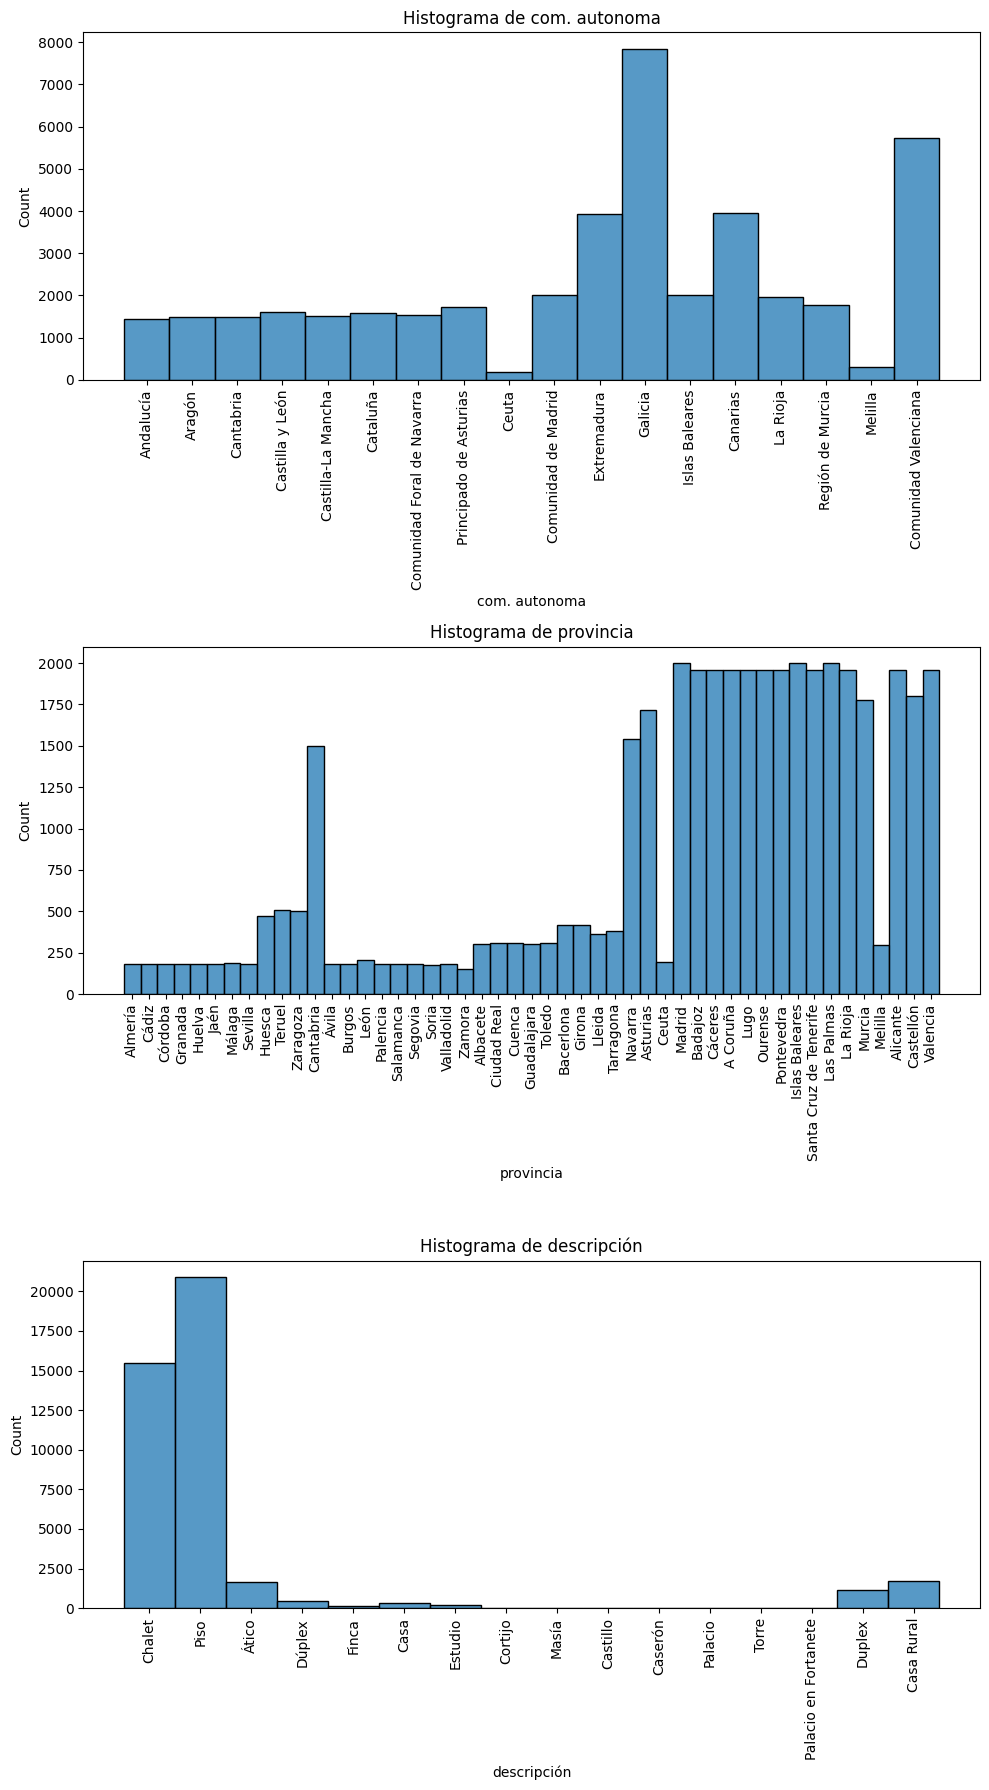

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Crear histograma para 'com. autonoma'
sns.histplot(ax=axes[0], data=dataframe, x='com. autonoma')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Histograma de com. autonoma')

# Crear histograma para 'provincia'
sns.histplot(ax=axes[1], data=dataframe, x='provincia')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Histograma de provincia')

# Crear histograma para 'descripción'
sns.histplot(ax=axes[2], data=dataframe, x='descripción')
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_title('Histograma de descripción')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## analisis numerico

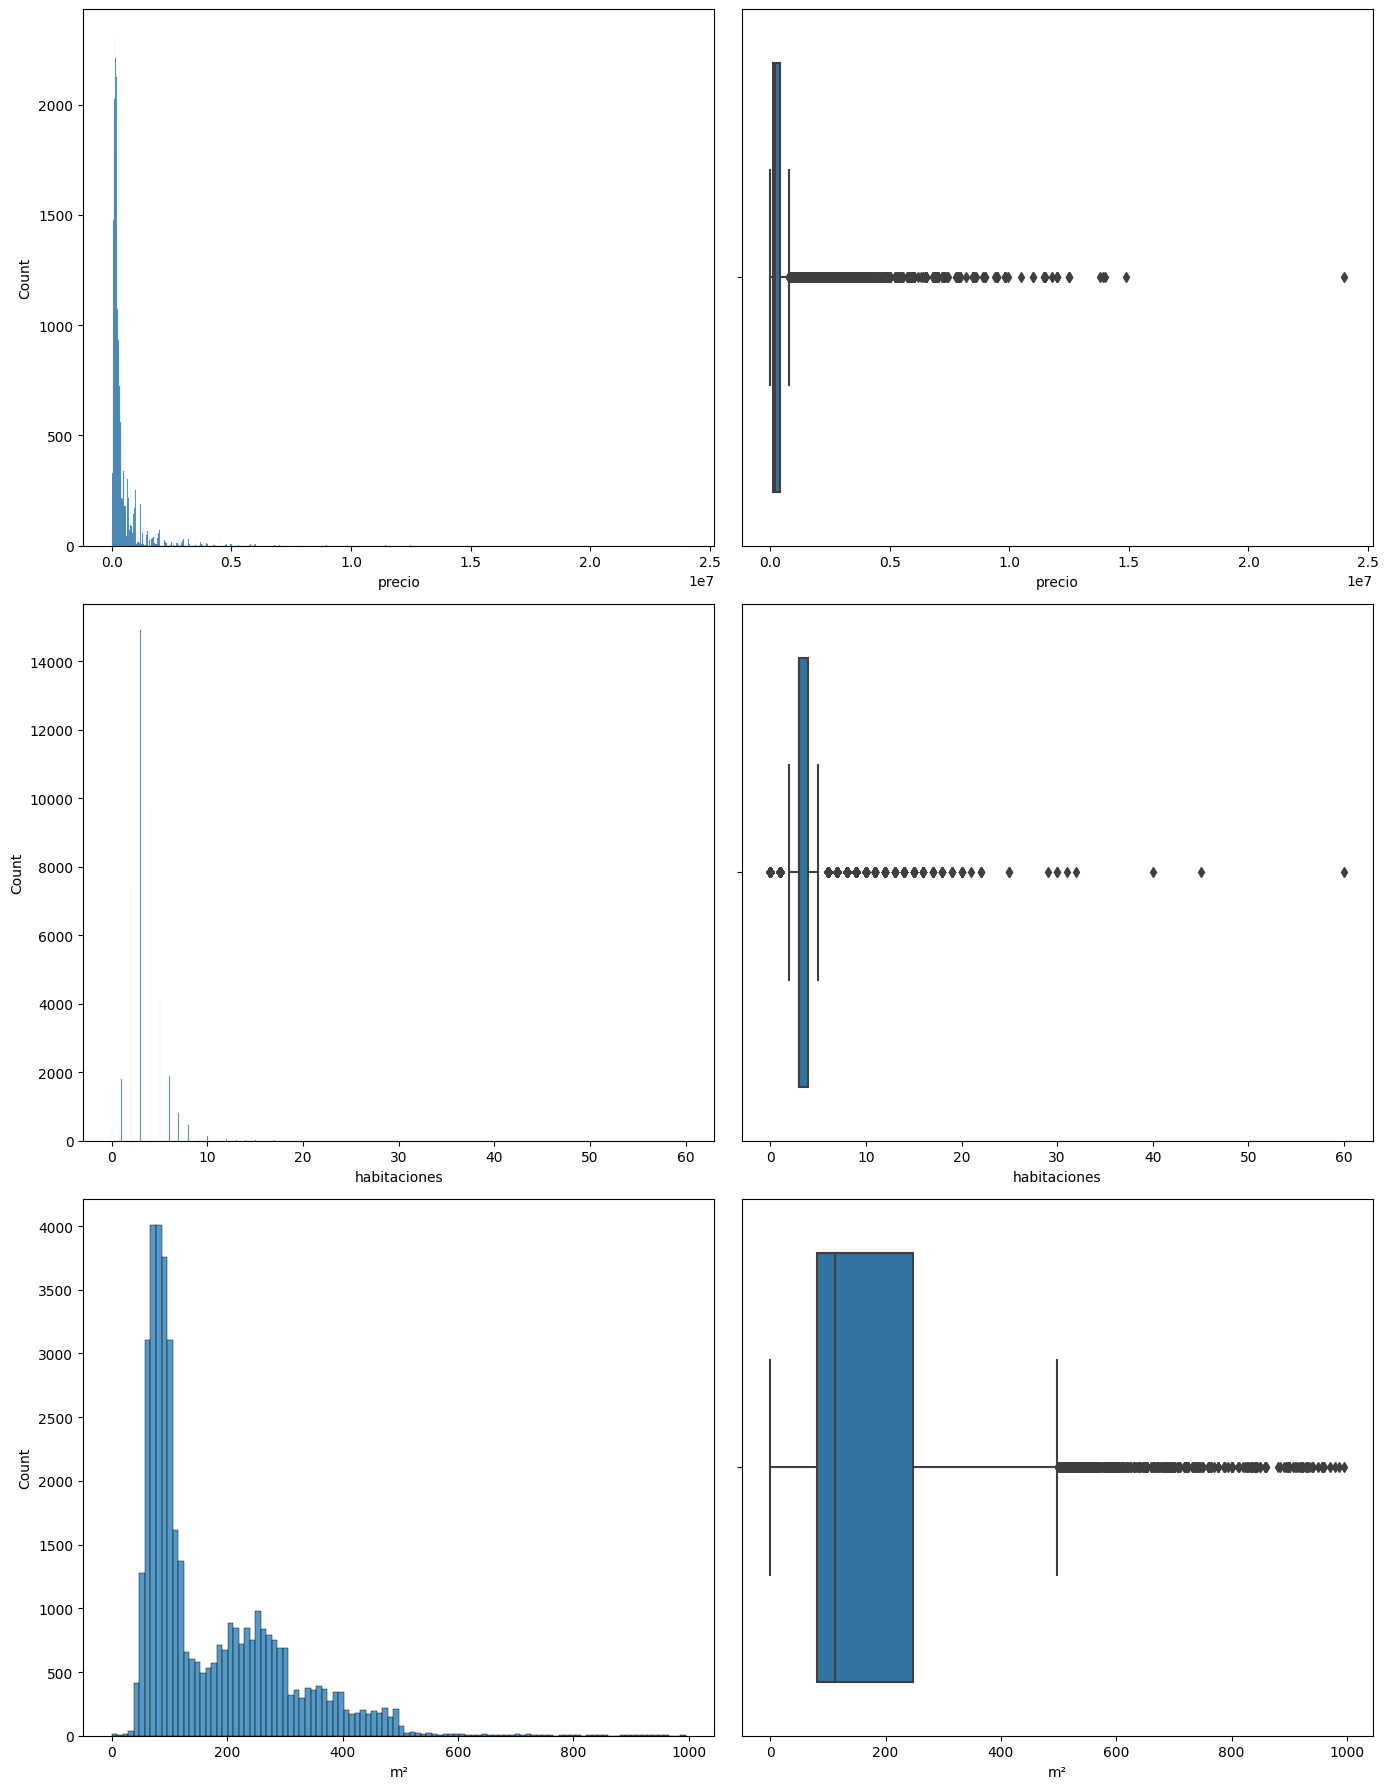

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 3 filas y 2 columnas
fig, axis = plt.subplots(3, 2, figsize=(14, 18))

# Gráficos de las variables numéricas
sns.histplot(ax=axis[0, 0], data=dataframe, x="precio")
sns.boxplot(ax=axis[0, 1], data=dataframe, x="precio")
sns.histplot(ax=axis[1, 0], data=dataframe, x="habitaciones")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="habitaciones")
sns.histplot(ax=axis[2, 0], data=dataframe, x="m²")
sns.boxplot(ax=axis[2, 1], data=dataframe, x="m²")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


## analisis categorico-categorico

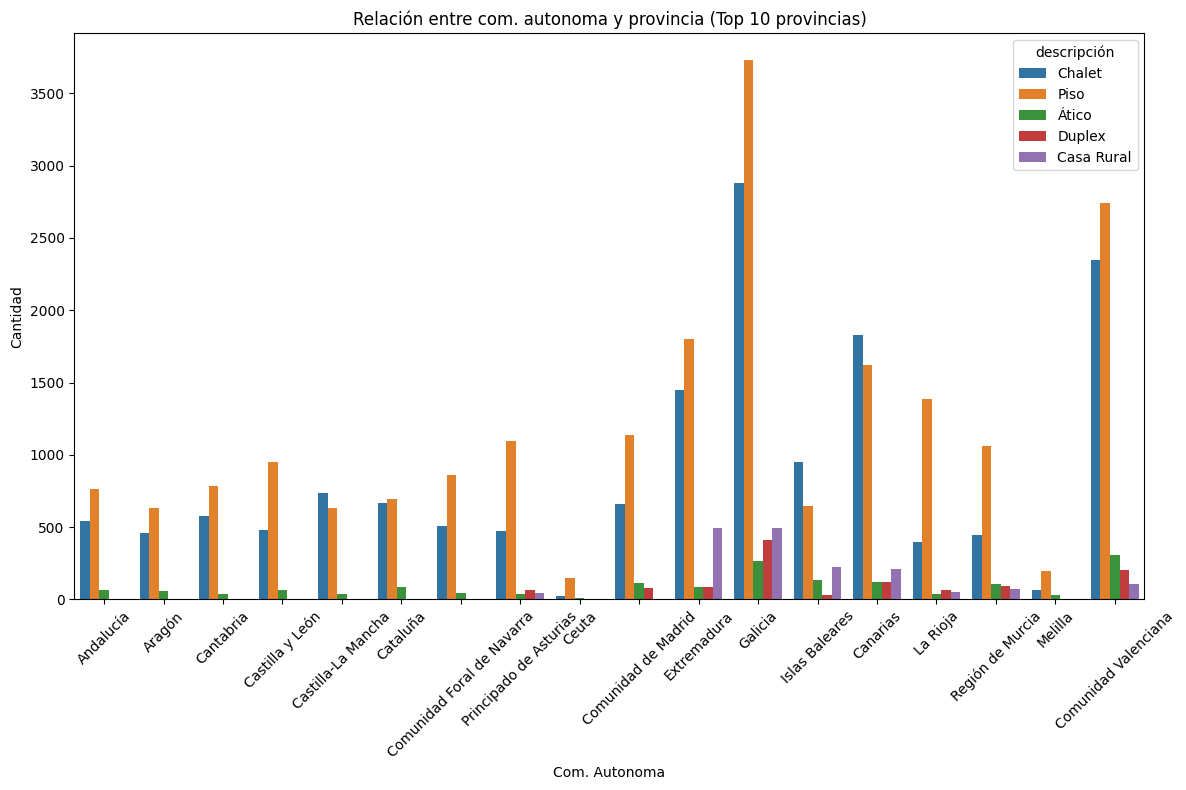

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las 10 provincias más importantes
top_10_provincias = dataframe['descripción'].value_counts().nlargest(5).index

# Filtrar el DataFrame solo para las 10 provincias más importantes
dataframe_top_10_provincias = dataframe[dataframe['descripción'].isin(top_10_provincias)]

# Crear una figura de subplots
fig, axes = plt.subplots(figsize=(12, 8))

# Crear un gráfico de barras para analizar 'com. autonoma' vs 'provincia'
sns.countplot(data=dataframe_top_10_provincias, x='com. autonoma', hue='descripción', ax=axes)
axes.set_title('Relación entre com. autonoma y provincia (Top 10 provincias)')
axes.set_xlabel('Com. Autonoma')
axes.set_ylabel('Cantidad')

# Rotar las etiquetas del eje x para mayor legibilidad
axes.tick_params(axis='x', rotation=45)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## analisis numerico-numerico

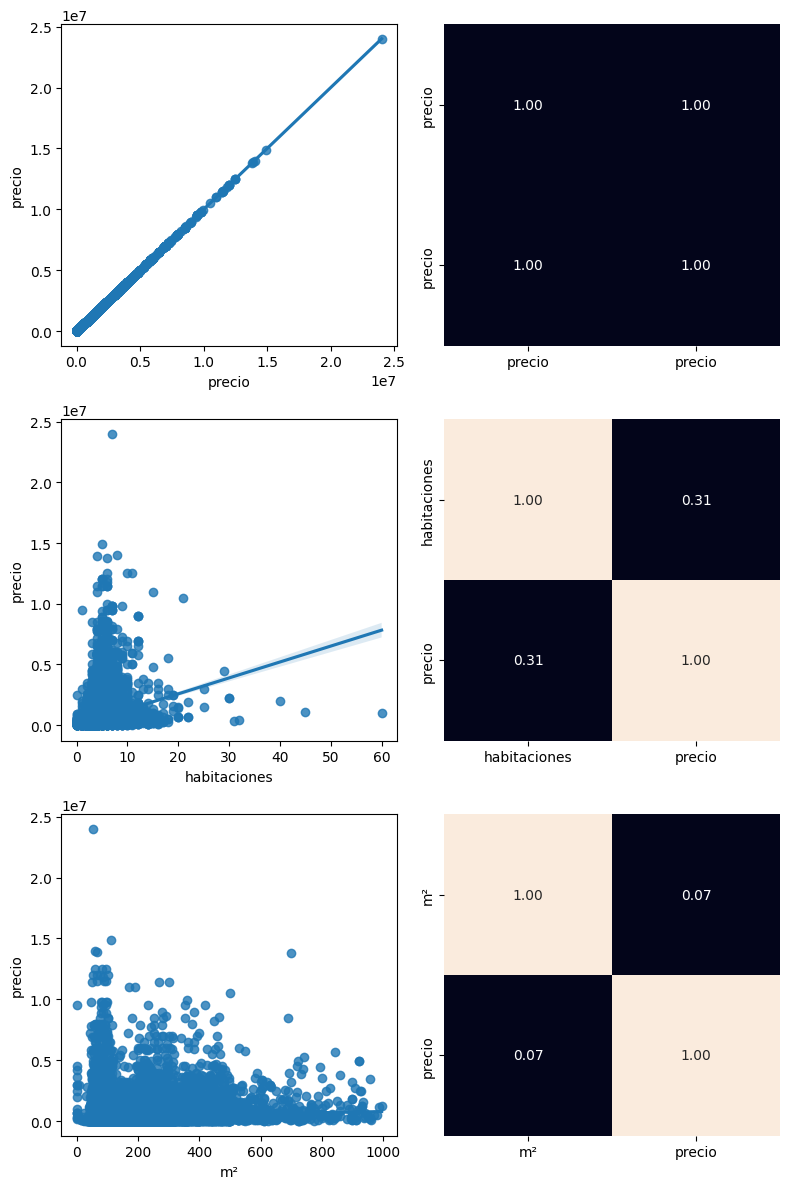

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables_vivienda = ['precio', 'habitaciones', 'm²']

# Crear una figura de subplots con configuración de filas y columnas
num_rows_vivienda = len(numeric_variables_vivienda)
fig_vivienda, axis_vivienda = plt.subplots(num_rows_vivienda, 2, figsize=(8, 4*num_rows_vivienda))

# Generar los gráficos de dispersión y las matrices de correlación para las variables numéricas
for i, var in enumerate(numeric_variables_vivienda):
    sns.regplot(ax=axis_vivienda[i, 0], data=dataframe, x=var, y="precio")
    sns.heatmap(dataframe[[var, "precio"]].corr(), annot=True, fmt=".2f", ax=axis_vivienda[i, 1], cbar=False)
    axis_vivienda[i, 0].set_ylabel("precio")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## categorico a numerico

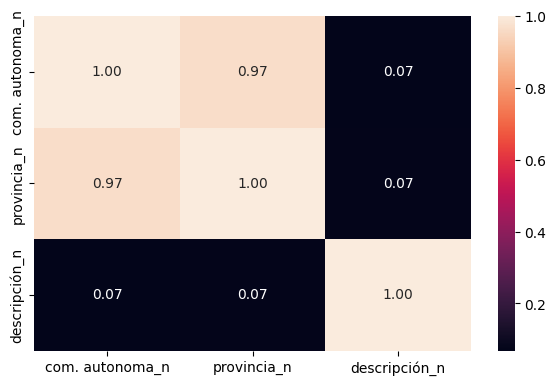

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame
dataframe_copy = dataframe.copy()

fig, axis = plt.subplots(figsize=(6, 4))

# Convert categorical columns to numerical using factorize on the copied DataFrame
dataframe_copy['com. autonoma_n'] = pd.factorize(dataframe_copy['com. autonoma'])[0]
dataframe_copy['provincia_n'] = pd.factorize(dataframe_copy['provincia'])[0]
dataframe_copy['descripción_n'] = pd.factorize(dataframe_copy['descripción'])[0]

# Plot the correlation heatmap
sns.heatmap(dataframe_copy[['com. autonoma_n', 'provincia_n', 'descripción_n']].corr(), annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

## analisis correlaciones

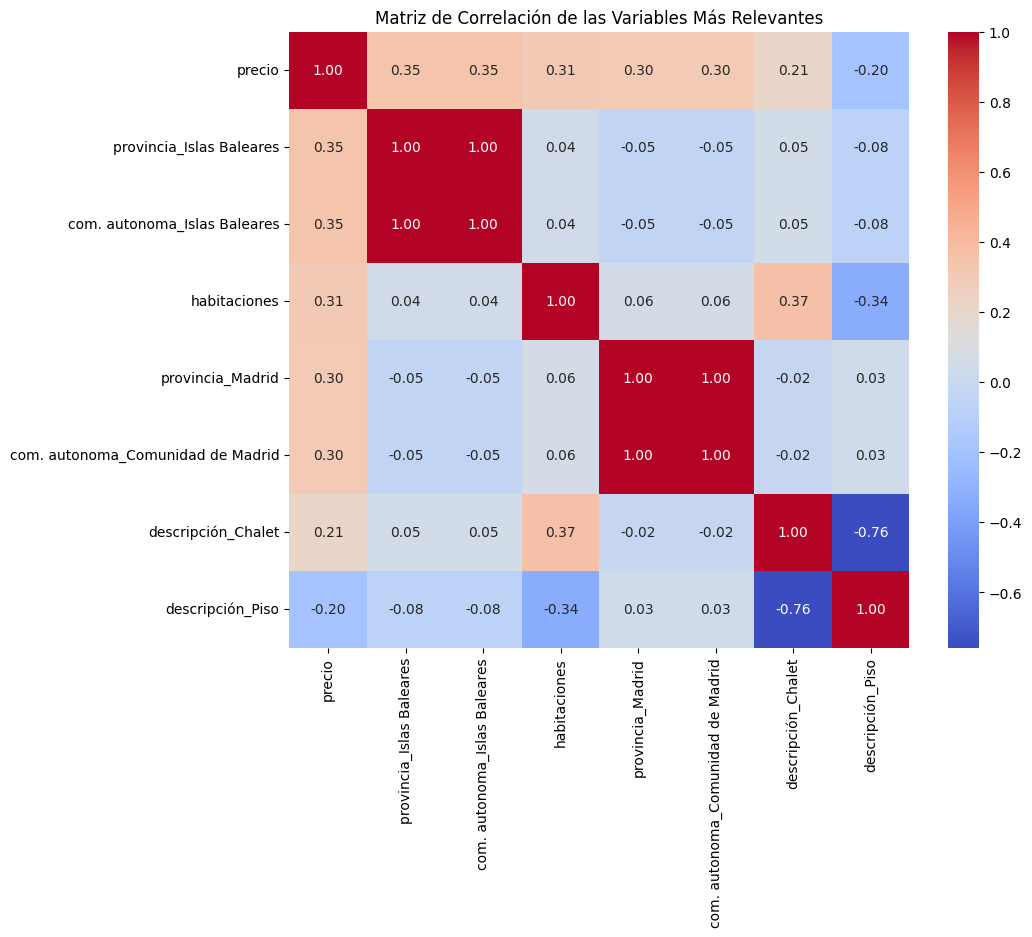

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Realizar one-hot encoding para las variables categóricas
dataframe_encoded = pd.get_dummies(dataframe, columns=['com. autonoma', 'provincia', 'descripción'], drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = dataframe_encoded.corr()

# Seleccionar las N variables más correlacionadas con 'precio'
N = 8  
top_correlated_features = correlation_matrix['precio'].abs().sort_values(ascending=False).head(N).index

# Filtrar la matriz de correlación para incluir solo las variables seleccionadas
correlation_matrix_filtered = correlation_matrix.loc[top_correlated_features, top_correlated_features]

# Visualizar la matriz de correlación filtrada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de las Variables Más Relevantes")
plt.show()


## analizamos las mejores variables

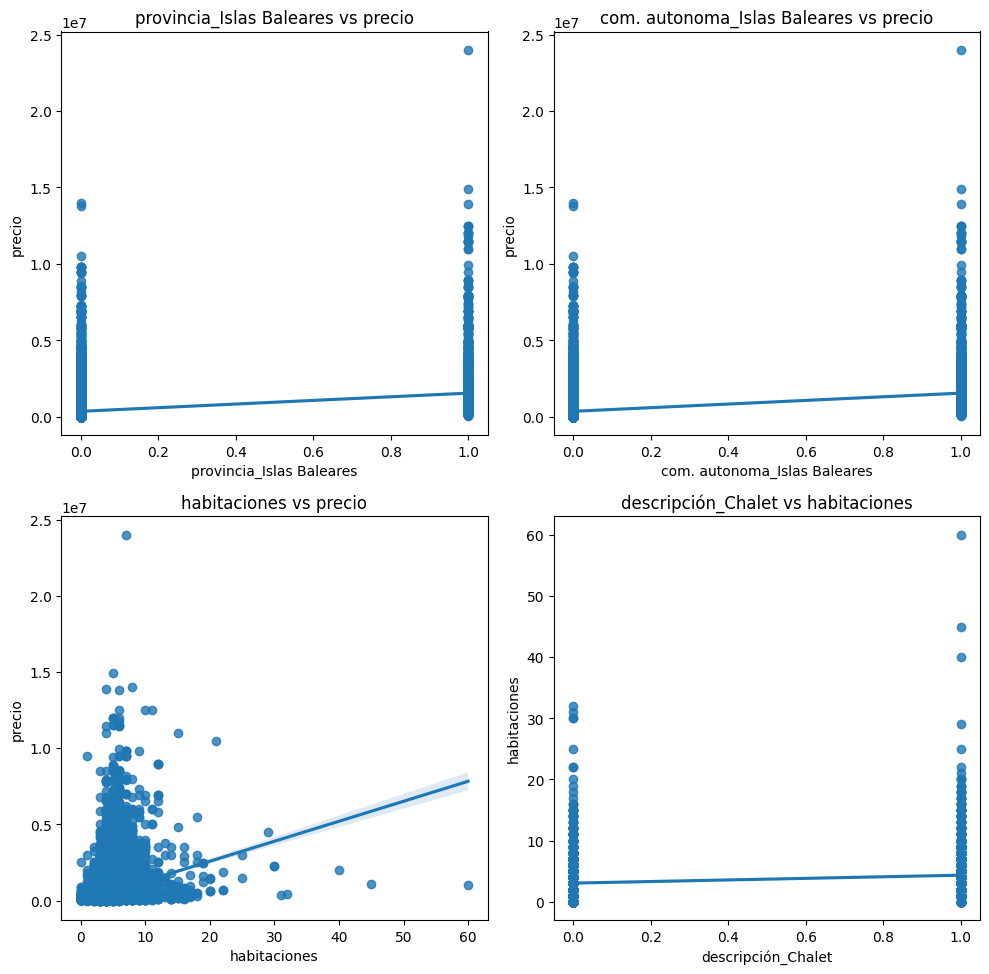

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame con las variables seleccionadas
variables_seleccionadas = dataframe_encoded[['precio', 'provincia_Islas Baleares', 'com. autonoma_Islas Baleares', 'habitaciones', 'descripción_Chalet']]

# Crear una figura de subplots con 2 filas y 2 columnas
fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)

# Realizar gráficos de dispersión para las variables seleccionadas
sns.regplot(ax=axes[0, 0], data=variables_seleccionadas, x='provincia_Islas Baleares', y='precio')
axes[0, 0].set_title('provincia_Islas Baleares vs precio')

sns.regplot(ax=axes[0, 1], data=variables_seleccionadas, x='com. autonoma_Islas Baleares', y='precio')
axes[0, 1].set_title('com. autonoma_Islas Baleares vs precio')

sns.regplot(ax=axes[1, 0], data=variables_seleccionadas, x='habitaciones', y='precio')
axes[1, 0].set_title('habitaciones vs precio')

sns.regplot(ax=axes[1, 1], data=variables_seleccionadas, x='descripción_Chalet', y='habitaciones')
axes[1, 1].set_title('descripción_Chalet vs habitaciones')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## dibujamos pairplot

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


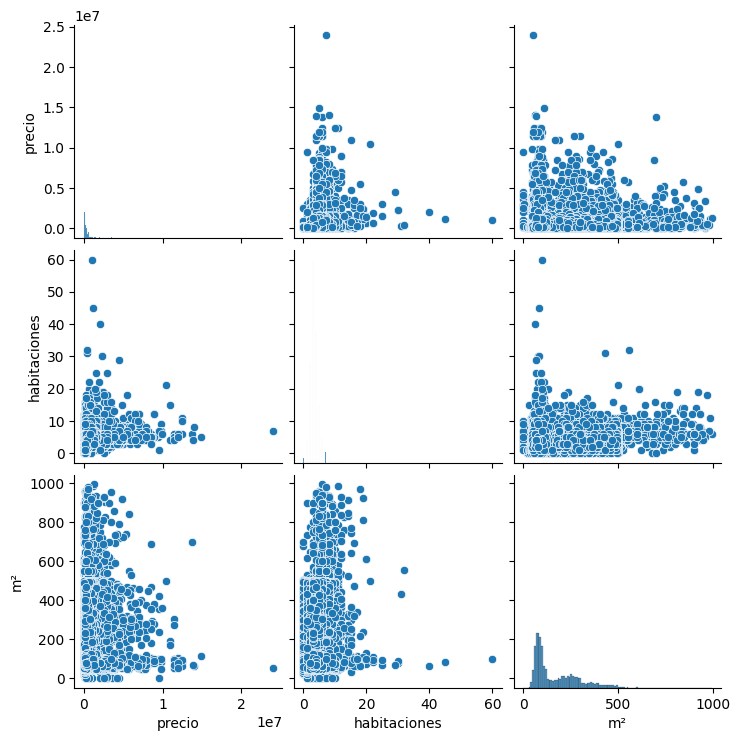

In [25]:

sns.pairplot(dataframe)

## análisis descriptivo

In [30]:
# Establecer el formato de punto flotante
pd.options.display.float_format = '{:.2f}'.format

# Realizar el análisis descriptivo
dataframe.describe()



,precio,habitaciones,m²
count,42072.00,42072.00,42072.00
mean,415886.98,3.52,171.77
std,730838.32,1.71,121.64
min,25.00,0.00,0.00
25%,129900.00,3.00,81.00
50%,220000.00,3.00,112.00
75%,398000.00,4.00,248.00
max,24000000.00,60.00,995.00
